# Project_02: Investigate a Dataset - A broad analysis about movies from TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this analysis a movie dataset from the TMDb will be investigated using the concept of the data analysis workflow learnd in the Data Analyst Nanodegree Program on Udacity. The data include roughly 10.000 movies including user ratings, costs and also revenue. The release years start from 1961 up to 2015.
Some basic questions to ask are summarized beneath.
>
> When looking through the data one quickly realizes that it isn't quite fair to compare moview from over 50 years ago with movies only 10 years old, since inflation infected the worth of 1$ a lot in the last 50 years. For this, two columns that got adjusted by the inflation were created and usd as a basis for economic comparison.

**Questions to ask:**
1.  Which movies & genres are most popular from year to year?
2.  How did the costs, revenues and profits (inflation adjusted) changed over the years?
3.  What kinds of properties are associated with movies that have high revenues?
4.  Have older movies in general had better profit margins compared to newer ones?
5.  Have movie series (triologies like Matrix) been more popular compared to single movies?
6.  Which factors influence the popularity of single movies the most? Test for:
    * cast (specific actors)
    * director
    * production company
7. Within a year, are there a specific months, where movies tend to be more popular? (correlation, yeartime to popularity)
    
    
    
    
    
*********************************DELETE LATER******************************************************    
**Notes Alex**:
* Where possible, vectorized operations and built-in functions are used instead of loops.
* usea at least 1 function
* document data cleaning
* use single and multi variable explorations
* use markdown cells to report


In [1]:
#import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

**General ideas and first insights:** <br>
Info: to check, if all planned tasks are done, a **DONE** will be added at the end of the respective tasks.

1. drop duplicates **DONE**
2. IDs as imdb_IDs not included into analysis, but kept for tracking reasons. sort to the end of the list. maybe to be deleted later **DONE**
3. Formats:
    * release_date // release_year --> Check if year from release_date differs from release_year! --> keep both: release_year for question 1; release_date for question 7. **DONE**
    * release_date cut away year,day --> just month needed. --> create: release_month **DONE**
    * change revenue_adj; cost_adj to int64 **DONE**
4. unnessecary columns: 
    * homepage --> no necessary information to solve questions. **DONE**
    * tagline  --> no necessary information to solve questions. **DONE**
    * overview --> no necessary information to solve questions. **DONE**
    * budget   --> we're using the adjusted version instead. **DONE**
    * revenue  --> we're using the adjusted version instead. **DONE**
    * imdb_id  --> no necessary information to solve questions. **DONE**
    * id       --> no necessary information to solve questions.  **DONE**
5. missing values:
    * cast     --> drop rows without cast. **DONE**
    * homepage --> not needed, as column will get deleted. **DONE**
    * director --> drop rows without director. **DONE**
    * tagline  --> not needed, as column will get deleted. **DONE**
    * keywords --> leave as it is, since keywords are not mandatory. --> put "unknown" where NaN **DONE**
    * overview --> not needed, as column will get deleted. **DONE**
    * genres   --> drop rows without genre. **DONE**
    * production_companies --> drop rows without production company. **DONE**
    * revenue_adj, budget_adj --> fill in mean **DONE**
6. split columns with more than 1 value ("|")
    * cast; keywords; genres; production_companies

### General Properties

In [2]:
# Loading data and do first rough checks (missing values, general infos and description)
df = pd.read_csv('tmdb-movies.csv')
df.head(10)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.shape

(10866, 21)

### Data Cleaning

In [6]:
# going through the points described in the "Data Wrangling" Chapter step by step:
# 1) drop duplicates:
#check for duplicates:
df.duplicated().sum()

#drop duplicates:
df.drop_duplicates(inplace=True)

#recheck for duplicates:
df.duplicated().sum()

0

In [7]:
# 2) sort ID columns to the end of the list for convenience:

columns = list(df.columns.values)
columns.pop(columns.index('id'))
columns.pop(columns.index('imdb_id'))

df = df[columns + ['id','imdb_id']]
df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,id,imdb_id
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,tt0369610
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,76341,tt1392190
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,262500,tt2908446
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,140607,tt2488496
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,168259,tt2820852


In [8]:
# 3) Format -->  Check if year from release_date differs from release_year! --> compare both dates
#--> keep both: release_year for question 1; release_date for question 7.

year_errors = (df['release_date'].str[-2:] == df['release_year'].astype(str).str[-2:])
year_errors.value_counts()

# we see that there are only "True" values which means that there are no differences between release_date year and release_year

True    10865
dtype: int64

In [9]:
# 3) change release_year from object to datetime and cut away year --> just day/month format.
# we do not loose data here, since we already proofed that the "year" information is in another column and the same as in the release_date column.
# we split the release_date on the "/" to answer question #7 later (for this we need only months and no years, days!)
release_month=[]

rel_date = df['release_date'].str.split("/")

for row in rel_date:
    if len(row[0]) > 1 and len(row[1]) > 1:
        release_month.append(row[0])
        
    if len(row[0]) <= 1 and len(row[1]) > 1:
        release_month.append("0"+row[0])

    if len(row[0]) <= 1 and len(row[1]) <= 1:
        release_month.append("0"+row[0])
        
    if len(row[0]) > 1 and len(row[1]) <= 1:
        release_month.append(row[0])

df['release_month'] = release_month
df['release_month'] = df['release_month'].astype(int)
df['release_month'].head(5)

0     6
1     5
2     3
3    12
4     4
Name: release_month, dtype: int64

In [10]:
#3 change revenue_adj; cost_adj to int64
df['revenue_adj'] = df['revenue_adj'].astype(int)
df['budget_adj'] = df['budget_adj'].astype(int)
df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,id,imdb_id,release_month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939,1392445892,135397,tt0369610,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939,348161292,76341,tt1392190,5
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,...,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955,271619025,262500,tt2908446,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,...,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919,1902723129,140607,tt2488496,12
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,...,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923,1385748801,168259,tt2820852,4


In [11]:
#4) . unnessecary columns
df.drop(['homepage', 'tagline','overview', 'budget','revenue', 'id','imdb_id'], axis=1, inplace=True)
df.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939,1392445892,6
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939,348161292,5
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955,271619025,3
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919,1902723129,12
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923,1385748801,4


In [12]:
#5) missing values:

df['keywords'] = df['keywords'].fillna("unknown")

# check for nulls in budget / revenue adjusted and replace by mean - not perfect, but works.
df['revenue_adj'] = df.revenue_adj.mask(df.revenue_adj == 0, df.revenue_adj.mean())
df['budget_adj'] = df.budget_adj.mask(df.budget_adj == 0, df.budget_adj.mean())

#df[df['cast'].isna()]
df.dropna(inplace=True) # drop nulls /Nans

df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

#check for clean data
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9772 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
keywords                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null int64
revenue_adj             9772 non-null int64
release_month           9772 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which movies & genres are most popular from year to year?

3 variables -->  genres, year, popularity

In [13]:
#find idx, where popularity is max.
df.groupby('release_year').popularity.idxmax().head()

release_year
1960    10141
1961    10110
1962     9849
1963    10438
1964     9881
Name: popularity, dtype: int64

In [14]:
#select exactly those rows per year.
pop_genres = df.loc[df.groupby('release_year').popularity.idxmax()]

In [15]:
pop_genres.genres.apply(lambda x: pd.value_counts(x.split("|"))).sum(axis=0)

Thriller           20.0
Horror              3.0
Drama              14.0
Animation           8.0
Comedy              6.0
Family             11.0
Adventure          31.0
Action             28.0
Science Fiction    20.0
Mystery             3.0
Crime               7.0
Music               2.0
Romance             3.0
Fantasy            10.0
dtype: float64

In [16]:
#ANSWER QUESTION 1: here we see, which genres have been most popular each year. 
pop_genres

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
10141,2.610362,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,5949601,235934958,8
10110,2.631987,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,puppy|animation|dog|dalmatian,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,6.6,1961,29179444,1574814739,1
9849,3.170651,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,Terence Young,london|england|assassination|spy|casino,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),10/4/62,560,6.7,1962,7929293,429623553,10
10438,2.508235,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,Terence Young,venice|london|terror|england|assassination,115,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,10/11/63,458,6.7,1963,17800448,561773358,10
9881,3.153791,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,Guy Hamilton,secret organization|secret intelligence servic...,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),9/17/64,602,7.0,1964,24605935,878080399,9
10689,1.910465,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,Terence Young,paris|florida|fighter pilot|sanatorium|secret ...,130,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),12/16/65,331,6.3,1965,76126200,977153544,12
10820,1.227582,How the Grinch Stole Christmas!,Boris Karloff|June Foray|Thurl Ravenscroft|Dal...,Chuck Jones|Ben Washam,holiday|based on novel|monster|obsession|santa...,26,Animation|Family|Comedy,MGM Television|The Cat in the Hat Productions,12/18/66,286,7.1,1966,2116174,51369001,12
10398,2.550704,The Jungle Book,Phil Harris|Sebastian Cabot|Louis Prima|George...,Wolfgang Reitherman,indian|snake|lion|musical|feral child,78,Family|Animation|Adventure,Walt Disney Pictures,10/18/67,928,7.0,1967,26147054,1345551058,10
9719,3.309196,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,moon|jupiter|artificial intelligence|man vs ma...,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,4/5/68,1708,7.7,1968,75227563,355546597,4
10724,1.778746,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Peter R. Hunt,london|suicide|england|switzerland|secret iden...,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/12/69,258,6.4,1969,41609849,487278044,12


In [17]:
pop_genres.genres.str.split("|")

10141                            [Drama, Horror, Thriller]
10110               [Adventure, Animation, Comedy, Family]
9849                         [Adventure, Action, Thriller]
10438                        [Action, Thriller, Adventure]
9881                         [Adventure, Action, Thriller]
10689                        [Adventure, Action, Thriller]
10820                          [Animation, Family, Comedy]
10398                       [Family, Animation, Adventure]
9719                 [Science Fiction, Mystery, Adventure]
10724                        [Adventure, Action, Thriller]
10648               [Animation, Comedy, Family, Adventure]
9923                              [Science Fiction, Drama]
7269                                        [Drama, Crime]
10593                                  [Animation, Family]
9758                                        [Drama, Crime]
9805                                               [Drama]
10173                                       [Crime, Dram

### Research Question 2  How did the costs, revenues and profits (inflation adjusted) changed over the years?

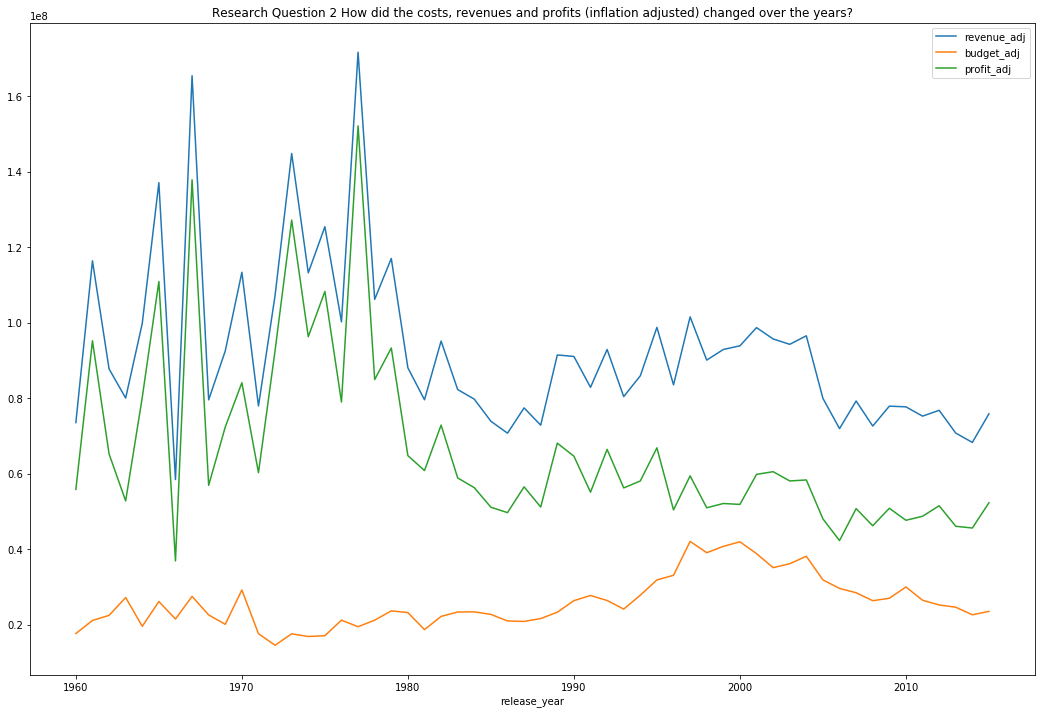

In [18]:
#look at mean of costs & revenues of each year. first add a column "Profits"
df['profit_adj']=(df.revenue_adj - df.budget_adj).astype(int)

df.groupby('release_year').revenue_adj.mean().astype(int).plot(figsize=(18,12), kind='line')
df.groupby('release_year').budget_adj.mean().plot( kind='line');
df.groupby('release_year').profit_adj.mean().plot( kind='line');
plt.legend();
plt.title("Research Question 2 How did the costs, revenues and profits (inflation adjusted) changed over the years?");


#ANSWER QUESTION 2:
#we see, that the budget used for movie-productions where highest between 1995 and 2005 with an increase from 1995 and decrease from 2005.
#


In [19]:
#get x and y values
x= df.release_year.unique()
y1= df.groupby('release_year').revenue_adj.mean()
y2= df.groupby('release_year').budget_adj.mean()
y3= df.groupby('release_year').profit_adj.mean()
x.sort()

df_plot = [x,y1]

#smoothen lines
from scipy.interpolate import spline
x_new = np.linspace(min(x),max(x),50)
y1_smooth = spline(x,y1,x_new)

ax.plot(x_new,y1_smooth/10**6)


fig, ax = plt.subplots()
ax.plot(x,y1 / 10**6);
ax.plot(x,y2 / 10**6);
ax.plot(x,y3 / 10**6);
fig.set_size_inches(18,12)
ax.set_title("Changes of budget, revenue and profit over the years in $", );
ax.legend();



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  del sys.path[0]


NameError: name 'ax' is not defined

In [ ]:
df.info()

### Research Question 3 to 7:  What kinds of properties are associated with movies that have high revenues?


### 4. Have older movies in general had better profit margins compared to newer ones?
### 5. Have movie series (triologies like Matrix) been more popular compared to single movies?
### 6. Which factors influence the popularity of single movies the most? Test for:
    cast (specific actors)
    director
    production company
### 7. Within a year, are there a specific months, where movies tend to be more popular? (correlation, yeartime to popularity)

In [ ]:
# the scatter matrix gives a ton of information to clarify the quesetions above and get an overview, before going into more detailed analysis.
pd.plotting.scatter_matrix(df, figsize=(20,20));


In [ ]:
#ANSWER RESEARCH QUESTION 3: 
# runtime: most revenue with movies around 200min, 170min and 120min with peak revenue at 162min runtime (Avatar.)
df.plot(x="revenue_adj", y="runtime", kind="scatter", figsize=(8,8), ylim=(0,400));
df[df.revenue_adj == 2827123750]

In [ ]:
#vote_count
df.plot(x="revenue_adj", y="vote_count", kind="scatter", figsize=(8,8));
#the less votes counted, the less revenue. 

In [ ]:
#vote_average
df.plot(x="revenue_adj", y="vote_average", kind="scatter", figsize=(8,8));
#the higher the vote_average, the more revenue.

In [ ]:
#release_year & RESERACH QUESTION 4: Have older movies in general had better profit margins compared to newer ones?
df.plot(x="revenue_adj", y="release_year", kind="scatter", figsize=(8,8));
df.plot(x="profit_adj", y="release_year", kind="scatter", figsize=(8,8));
#when looking at the graphs, I need a closer look, so zoom into the x values (cut away the right side --> see next cell)
#here we see, that independent of the release year, some movies brought exceptional reveneus and profits. (outliers)
df.nlargest(7, 'revenue_adj') # the 7 outlierswith the highest revenues

In [ ]:
df.plot(x="revenue_adj", y="release_year", kind="scatter", figsize=(8,8), xlim=(0,1.5 * 10**9));
df.plot(x="profit_adj", y="release_year", kind="scatter", figsize=(8,8), xlim=(-0.5* 10**9,1.5 * 10**9));

#in the closer look we see a sligh increase in revenue and profits, the "younger" the movies are.

In [ ]:
#budget_adj
df.plot(x="revenue_adj", y="budget_adj", kind="scatter", figsize=(8,8));
#the less budget used, the less revenue. still, there are some outliers
df.budget_adj.min()
df.revenue_adj.max()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**<br>
For question #3 in Data Cleaning:
"Is there any better way to get the right format for the date? I don't like my solution with the For and if statements, but found no better way..."

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])